In [1]:
!pip uninstall -y tensorflow
!pip uninstall -y tensorflow-gpu
!pip install -q tensorflow-gpu==2.0.0-beta1

Uninstalling tensorflow-2.3.0:
  Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 348.9MB 37kB/s 
     |████████████████████████████████| 3.1MB 40.4MB/s 
     |████████████████████████████████| 501kB 46.0MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 


In [2]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

cifar10 = tf.keras.datasets.cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0 , x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_Train.shape = %s",x_train.shape)
print("y_Train.shape = %s",y_train.shape)

170500096/170498071 [==============================] - 2s 0us/step
x_Train.shape = %s (50000, 32, 32, 3)
y_Train.shape = %s (50000,)


In [7]:
K = len(set(y_train))
print("No of CATEGORIES = %s",K)

No of CATEGORIES = %s 10


In [9]:
i= Input(shape=x_train[0].shape)
x= Conv2D(32, (3, 3), strides=2,activation='relu')(i)
x= Conv2D(64, (3, 3), strides=2,activation='relu')(x)
x= Conv2D(128, (3, 3), strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i,x)


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 42s 847us/sample - loss: 1.5147 - accuracy: 0.4499 - val_loss: 1.2940 - val_accuracy: 0.5431
Epoch 2/15
50000/50000 [==============================] - 42s 846us/sample - loss: 1.1882 - accuracy: 0.5753 - val_loss: 1.0884 - val_accuracy: 0.6118
Epoch 3/15
50000/50000 [==============================] - 43s 863us/sample - loss: 1.0327 - accuracy: 0.6336 - val_loss: 0.9876 - val_accuracy: 0.6433
Epoch 4/15
50000/50000 [==============================] - 42s 848us/sample - loss: 0.9190 - accuracy: 0.6717 - val_loss: 0.9788 - val_accuracy: 0.6533
Epoch 5/15
50000/50000 [==============================] - 44s 874us/sample - loss: 0.8369 - accuracy: 0.7032 - val_loss: 0.9283 - val_accuracy: 0.6754
Epoch 6/15
50000/50000 [==============================] - 49s 985us/sample - loss: 0.7572 - accuracy:

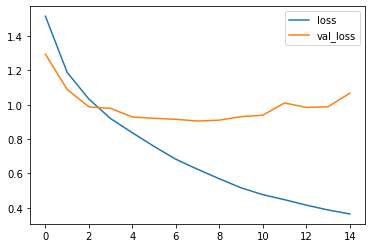

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()


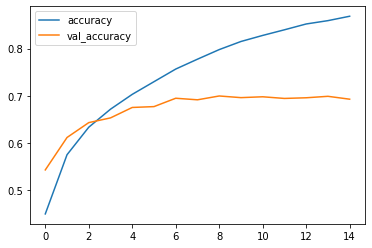

In [12]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Not Normalized confusion matrix
[[771  14  30  17  31  11   8  18  55  45]
 [ 14 790   5  10   1  10  13   5  30 122]
 [ 71   9 536  67  98  71  86  41  12   9]
 [ 19   9  49 450  77 191  97  69  11  28]
 [ 28   7  48  61 659  33  82  75   4   3]
 [ 16   6  32 203  55 561  50  63   6   8]
 [  4   5  31  59  42  30 800  16   8   5]
 [  9   4  22  27  66  58  14 784   3  13]
 [ 79  36  14  17  15   6   9  10 783  31]
 [ 35  80   8  12   6  11  14  19  20 795]]


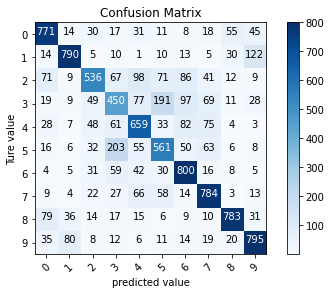

In [13]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes, normalize= False,title='Confusion Matrix', cmap = plt.cm.Blues): 
  if normalize:
    cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Not Normalized confusion matrix')
  print(cm)
  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks =np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation='45')
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text( j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
            color = "white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('Ture value')
  plt.xlabel('predicted value')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [14]:
labels='''airplane
automobile
bird 
cat
deer
dog
frog
horse
ship
truck'''.split()

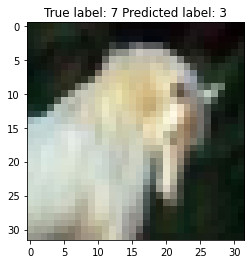

In [18]:
misclassfied_idx = np.where( p_test != y_test)[0]
i= np.random.choice(misclassfied_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted label: %s" % (y_test[i], p_test[i])) ; 